# Dataset 

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

%matplotlib inline

# import dataset

In [2]:
train = np.loadtxt("train/X_train.txt")
test = np.loadtxt("test/X_test.txt")

In [3]:
print("train shape : ",train.shape)
print("test shape : ", test.shape)

train shape :  (7352, 561)
test shape :  (2947, 561)


In [3]:
target = np.loadtxt("train/y_train.txt")
test_target = np.loadtxt("train/y_test.txt")

In [4]:
target

array([5., 5., 5., ..., 2., 2., 2.])

In [5]:
print(target.shape)
print(test_target.shape)

(7352,)
(2947,)


In [6]:
text = open('features.txt','r')
feature = text.readlines()
print(len(feature))
text.close()

561


In [7]:
all_value = np.concatenate([train,test])

In [8]:
all_value

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

In [9]:
target_value = np.concatenate([target,test_target])

In [10]:
data = pd.DataFrame(data = all_value, columns = feature)

In [11]:
data.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [12]:
data['Target'] = target_value

In [13]:
data.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Target
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0


In [14]:
#data.to_csv('HAR.csv')

In [15]:
data_values = data.drop(columns='Target',axis=0).values

In [16]:
data_values.shape

(10299, 561)

In [17]:
data_target = data["Target"].values

# PCA 

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_values = pca.fit_transform(data_values)

In [19]:
pcaDf = pd.DataFrame(data = pc_values, columns = ['pc 1', 'pc 2'])

In [20]:
pcaDf['Target'] = data_target

In [21]:
pcaDf.head()

,pc 1,pc 2,Target
0,-5.537858,-0.716346,5.0
1,-5.564174,-0.579506,5.0
2,-5.499319,-0.297684,5.0
3,-5.700396,0.354586,5.0
4,-5.769082,0.559390,5.0


# Visualize PCA

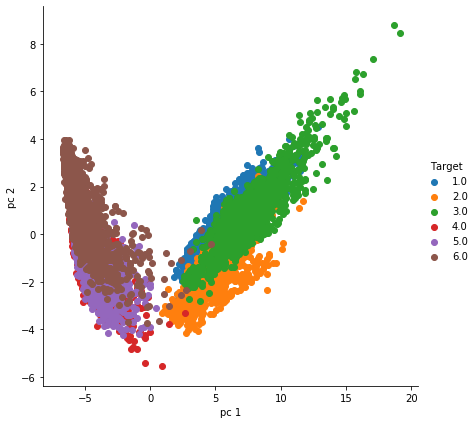

In [22]:
sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
plt.show()

In [23]:
dmap = {1.0:'WALKING',2.0:'WALKING_UPSTAIRS',3.0:' WALKING_DOWNSTAIRS',4.0:'SITTING',5.0:'STANDING',6.0:' LAYING'}

In [24]:
pcaDf['Target'] = pcaDf["Target"].map(dmap)

In [25]:
pcaDf.head()

,pc 1,pc 2,Target
0,-5.537858,-0.716346,STANDING
1,-5.564174,-0.579506,STANDING
2,-5.499319,-0.297684,STANDING
3,-5.700396,0.354586,STANDING
4,-5.769082,0.559390,STANDING


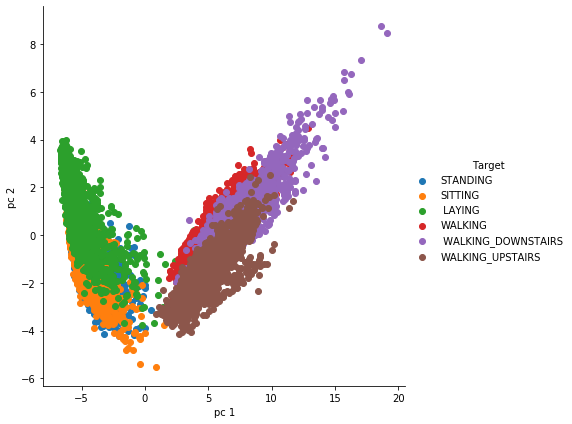

In [26]:
sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
plt.show()

# Signal data

In [27]:
body_acc_x_train = np.loadtxt("train/inertial Signals/body_acc_x_train.txt")
body_acc_y_train = np.loadtxt("train/inertial Signals/body_acc_y_train.txt")
body_acc_z_train = np.loadtxt("train/inertial Signals/body_acc_z_train.txt")

In [28]:
body_gyro_x_train = np.loadtxt("train/inertial Signals/body_gyro_x_train.txt")
body_gyro_y_train = np.loadtxt("train/inertial Signals/body_gyro_y_train.txt")
body_gyro_z_train = np.loadtxt("train/inertial Signals/body_gyro_z_train.txt")

In [29]:
total_acc_x_train = np.loadtxt("train/inertial Signals/total_acc_x_train.txt")
total_acc_y_train = np.loadtxt("train/inertial Signals/total_acc_y_train.txt")
total_acc_z_train = np.loadtxt("train/inertial Signals/total_acc_z_train.txt")

In [48]:
print("shape x: ",body_gyro_x_train.shape)
print("shape y: ",body_gyro_y_train.shape)
print("shape z: ",body_gyro_z_train.shape)

shape x:  (7352, 128)
shape y:  (7352, 128)
shape z:  (7352, 128)


In [30]:
print("shape x: ",body_acc_x_train.shape)
print("shape y: ",body_acc_y_train.shape)
print("shape z: ",body_acc_z_train.shape)

shape x:  (7352, 128)
shape y:  (7352, 128)
shape z:  (7352, 128)


In [31]:
print("shape x: ",body_gyro_x_train.shape)
print("shape y: ",body_gyro_y_train.shape)
print("shape z: ",body_gyro_z_train.shape)

shape x:  (7352, 128)
shape y:  (7352, 128)
shape z:  (7352, 128)


In [52]:
t_x = body_acc_x_train+body_gyro_x_train+total_acc_x_train
t_y = body_acc_y_train+body_gyro_y_train+total_acc_y_train
t_z = body_acc_z_train+body_gyro_z_train+total_acc_z_train

In [53]:
signal_values = np.append(t_x,t_y,axis=1)

In [55]:
signal_values = np.append(signal_values,t_z,axis=1)

In [56]:
signal_values.shape

(7352, 384)

In [58]:
target.shape

(7352,)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scale_signal = scaler.fit_transform(signal_values)

In [76]:
scale_signal.shape

(7352, 384)

In [64]:
pc_values_signals = pca.fit_transform(scale_signal)

In [65]:
pc_values_signals.shape

(7352, 2)

In [66]:
pcaDf_1 = pd.DataFrame(data = pc_values_signals, columns = ['pc 1', 'pc 2'])

In [67]:
pcaDf_1['Target'] = target

In [68]:
pcaDf_1.head()

,pc 1,pc 2,Target
0,-3.333131,-3.209310,5.0
1,-3.499894,-3.264865,5.0
2,-3.544931,-3.199347,5.0
3,-3.690900,-2.916881,5.0
4,-3.675817,-2.812341,5.0


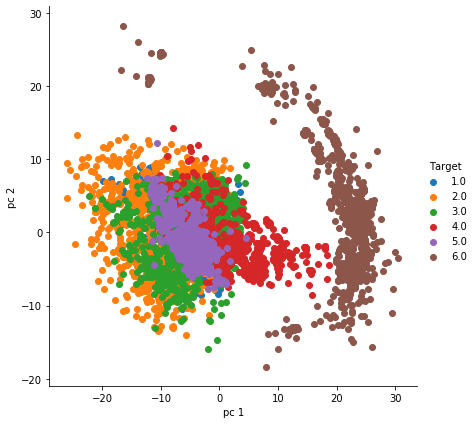

In [69]:
sns.FacetGrid(pcaDf_1,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
plt.show()

In [70]:
pcaDf_1['Target'] = pcaDf_1["Target"].map(dmap)

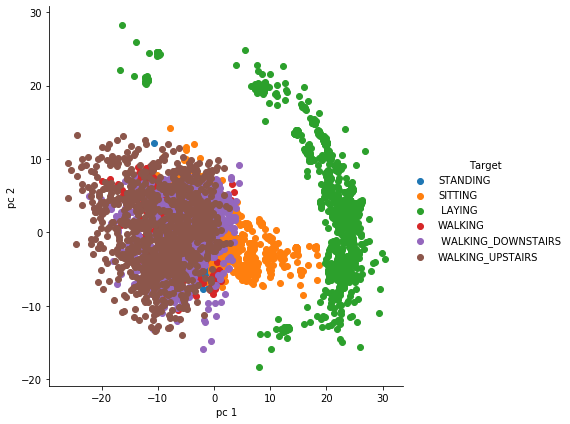

In [72]:
sns.FacetGrid(pcaDf_1,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
plt.show()

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(scale_signal, target, test_size=0.20, random_state=142)

In [73]:
def Model(X,y,algorithm,test):
    clf = algorithm.fit(X,y)
    pred = clf.predict(test)
    
    return clf, pred

In [78]:
# import SVM algorithm
from sklearn.svm import SVC

In [79]:
clf_svc,pred_svc = Model(X=X_train,y=y_train,algorithm=SVC(probability=True),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
# For model evolution
def model_evalution(y_test, y_pred):
    print("------------------- Model evaluation ----------------\n\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score : ",accuracy_score(y_test,y_pred),'\n')
    print("Classification Report : \n",classification_report(y_test, y_pred))
   


In [81]:
model_evalution(y_test,pred_svc)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[239   5   4   0   0   0]
 [  0 203   7   0   0   0]
 [  1   0 185   0   0   0]
 [  0   1   0 208  39   0]
 [  0   0   0  28 247   0]
 [  0   0   0   0   0 304]]

Accuracy Score :  0.9422161794697484 

Classification Report : 
               precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       248
         2.0       0.97      0.97      0.97       210
         3.0       0.94      0.99      0.97       186
         4.0       0.88      0.84      0.86       248
         5.0       0.86      0.90      0.88       275
         6.0       1.00      1.00      1.00       304

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.94      0.94      0.94      1471



In [82]:
# create heatmap for confusion matrix
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

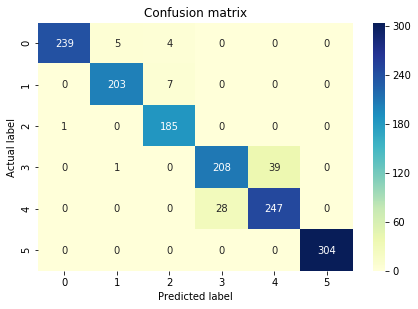

In [83]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_svc)))

In [84]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_svc,X=X_train,y=y_train,cv=10).mean())

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-p

K-Fold Cross validation score :  0.9355608370020935
